<a href="https://colab.research.google.com/github/pjcroxas/Talent-Retention-in-Railway-Workforce/blob/main/Comprehensive_Data_Analysis_Railway_Workforce_Retention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, math
import matplotlib.ticker as mtick
from matplotlib import style

In [2]:
dir = "/content/drive/My Drive/Data Science Portfolio/2024/Talent Retention"

In [3]:
dir = "/content/drive/My Drive/Data Science Portfolio/2024/Talent Retention"
retention_df = pd.read_excel(dir+"/talent-retention-dataset.xlsx")
retention_df.head()

,Age,Sex,HighestEducationalAttainment,YearsofService,Occupation,Organization,NatureofEmployment,JF1,JF2,JL1,...,RM11,ITL1,ITS1,ITS2,ITS3,ITS4,ITL2,ITS5,ITS6,ITL3
0,36-40,Male,Bachelor's Degree,11-15 Years,Government Employee,Light Rail Transit Authority (LRTA),Permanent,3,4,2,...,3,3,3,3,3,3,3,3,3,3
1,46-50,Male,Bachelor's Degree,16-20 Years,Tranport operations Supervisor B,Light Rail Transit Authority (LRTA),Contractual,4,5,5,...,2,3,4,4,4,3,3,5,5,3
2,36-40,Male,Bachelor's Degree,11-15 Years,Transport Operations Supervisor B,Light Rail Transit Authority (LRTA),Contractual,4,5,3,...,4,4,5,5,5,3,3,5,5,4
3,46-50,Male,Bachelor's Degree,16-20 Years,Transport Operations Supervisor B,Light Rail Transit Authority (LRTA),Contractual,5,4,5,...,5,3,4,3,4,3,3,5,5,3
4,26-30,Male,Bachelor's Degree,6-10 Years,Train Driver A,Light Rail Transit Authority (LRTA),Contractual,5,5,4,...,5,3,5,5,5,5,3,5,5,3


**Job Embeddedness**

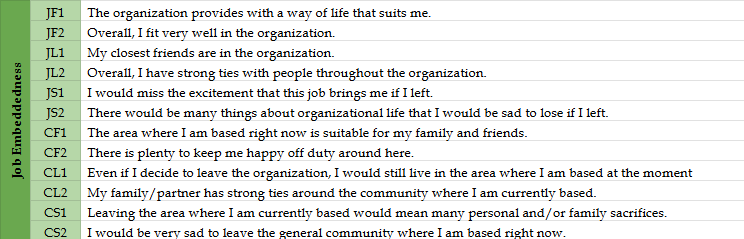

**Talent Management**

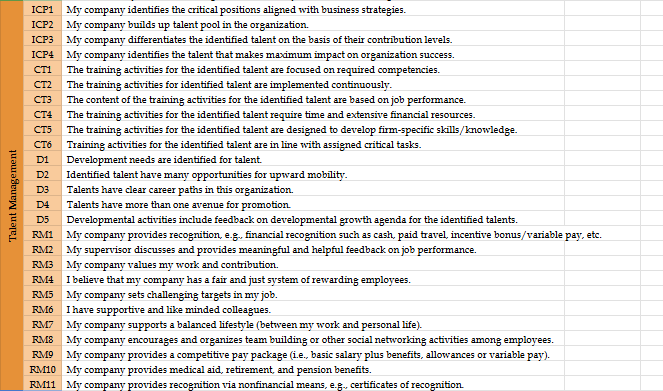

**Employee Retention**

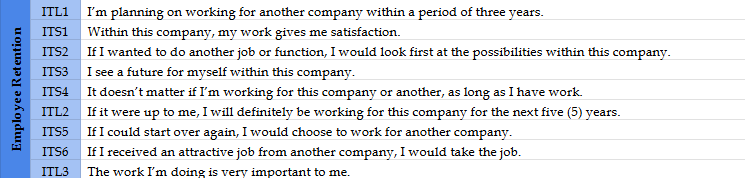

In [4]:
retention_df["HighestEducationalAttainment"].unique()

array(["Bachelor's Degree", "Associate's Degree/Vocational/Diploma",
       "Master's Degree", 'High School (Before K-12)'], dtype=object)

In [5]:
def rename_education(value):
  if value == "Bachelor's Degree":
    return "Bachelor"
  elif value == "Master's Degree":
    return "Master"
  elif value == "Postgraduate":
    return "Postgraduate"
  elif value == "Associate's Degree/Vocational/Diploma":
    return "Associate"
  else:
    return "High School"

retention_df["education"] = retention_df["HighestEducationalAttainment"].apply(rename_education)

In [6]:
def remove_character(value, character):
  return value.replace(character, "")

retention_df["Tenure"] = retention_df["YearsofService"].apply(remove_character, character="Years")

## Univariate Analysis

In [7]:
retention_df.columns

Index(['Age', 'Sex', 'HighestEducationalAttainment', 'YearsofService',
       'Occupation', 'Organization', 'NatureofEmployment', 'JF1', 'JF2', 'JL1',
       'JL2', 'JS1', 'JS2', 'CF1', 'CF2', 'CL1', 'CL2', 'CS1', 'CS2', 'ICP1',
       'ICP2', 'ICP3', 'ICP4', 'CT1', 'CT2', 'CT3', 'CT4', 'CT5', 'CT6', 'D1',
       'D2', 'D3', 'D4', 'D5', 'RM1', 'RM2', 'RM3', 'RM4', 'RM5', 'RM6', 'RM7',
       'RM8', 'RM9', 'RM10', 'RM11', 'ITL1', 'ITS1', 'ITS2', 'ITS3', 'ITS4',
       'ITL2', 'ITS5', 'ITS6', 'ITL3', 'education', 'Tenure'],
      dtype='object')

In [8]:
# style.use("")
def plot_univariate(feature, plot_type, angle, data=retention_df):
  count = data[feature].value_counts().sort_values()

  if plot_type == "pie":
    ax = count.plot(kind=plot_type, autopct='%1.1f%%', startangle=90, ylabel="", figsize=(6,6))

  else:
    ax = count.plot(kind=plot_type)
    xlabels = ax.get_xticklabels()
    sum = data[feature].value_counts().sum()
    for i, v in enumerate(count):
      ax.text(i, v, f"{v}\n({v/sum:.1%})", ha="center", fontsize=10)  # 1% format
      ax.set_xticklabels(xlabels, rotation=angle, ha='right', rotation_mode='anchor')

Text(0.5, 0, 'Age Range')

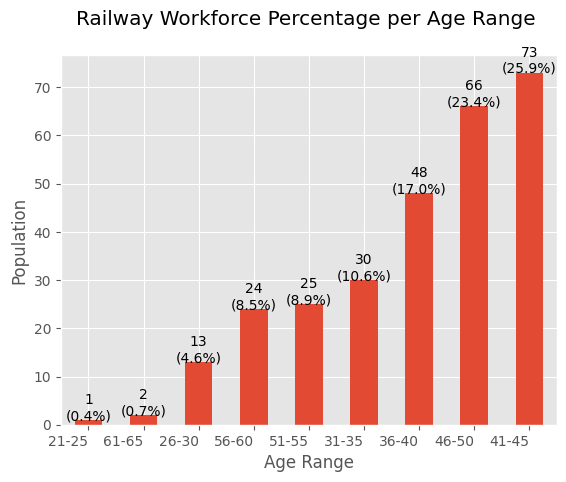

In [9]:
style.use("ggplot")
plot_univariate("Age", "bar", 0)
plt.title("Railway Workforce Percentage per Age Range \n")
plt.ylabel("Population")
plt.xlabel("Age Range")

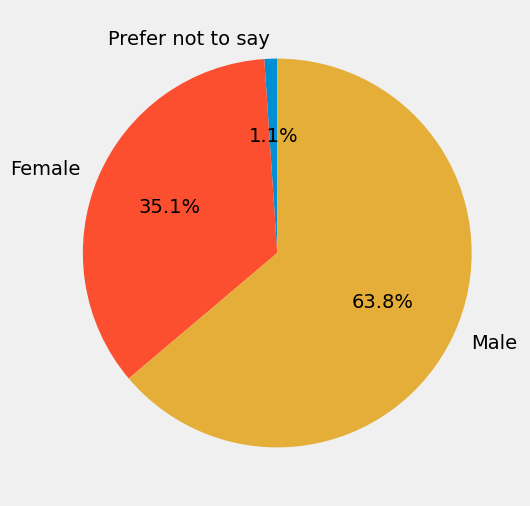

In [10]:
style.use("fivethirtyeight")
plot_univariate("Sex", "pie", 0)

Text(0.5, 0, 'Education')

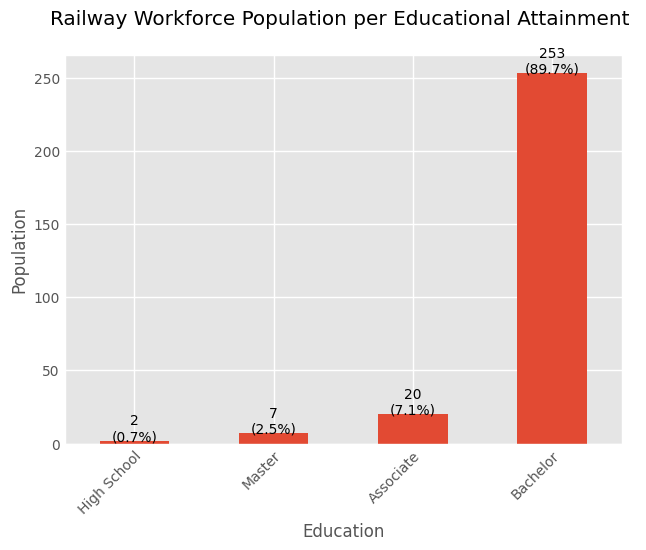

In [11]:
style.use("ggplot")
plot_univariate("education", "bar", 45)
plt.title("Railway Workforce Population per Educational Attainment \n")
plt.ylabel("Population")
plt.xlabel("Education")

Text(0.5, 0, 'Years of Service')

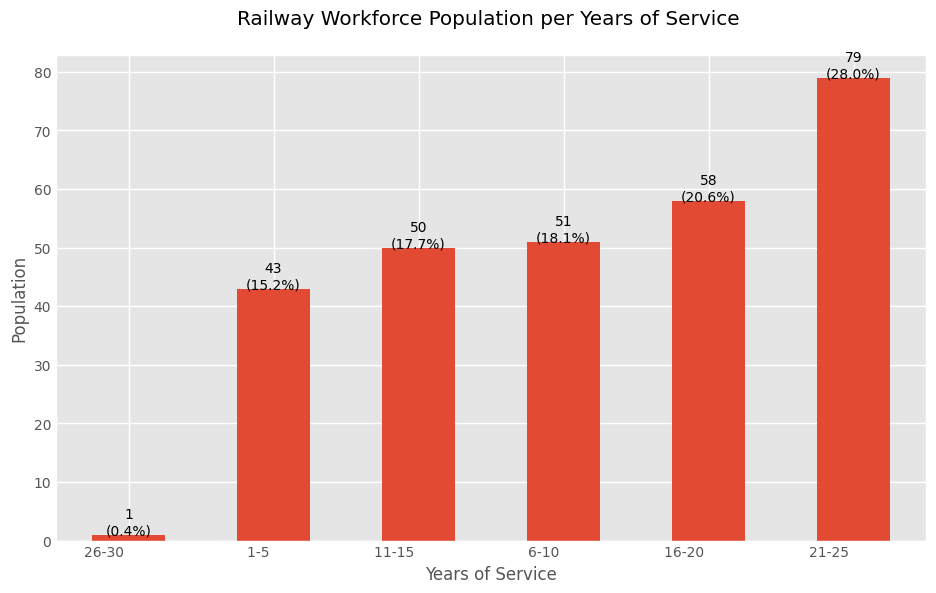

In [12]:
# retention_df["YearsofService"].value_counts().sum()
plt.figure(figsize=(10,6))
style.use("ggplot")
plot_univariate("Tenure", "bar", 0)
plt.title("Railway Workforce Population per Years of Service \n")
plt.ylabel("Population")
plt.xlabel("Years of Service")

In [13]:
retention_df.columns

Index(['Age', 'Sex', 'HighestEducationalAttainment', 'YearsofService',
       'Occupation', 'Organization', 'NatureofEmployment', 'JF1', 'JF2', 'JL1',
       'JL2', 'JS1', 'JS2', 'CF1', 'CF2', 'CL1', 'CL2', 'CS1', 'CS2', 'ICP1',
       'ICP2', 'ICP3', 'ICP4', 'CT1', 'CT2', 'CT3', 'CT4', 'CT5', 'CT6', 'D1',
       'D2', 'D3', 'D4', 'D5', 'RM1', 'RM2', 'RM3', 'RM4', 'RM5', 'RM6', 'RM7',
       'RM8', 'RM9', 'RM10', 'RM11', 'ITL1', 'ITS1', 'ITS2', 'ITS3', 'ITS4',
       'ITL2', 'ITS5', 'ITS6', 'ITL3', 'education', 'Tenure'],
      dtype='object')

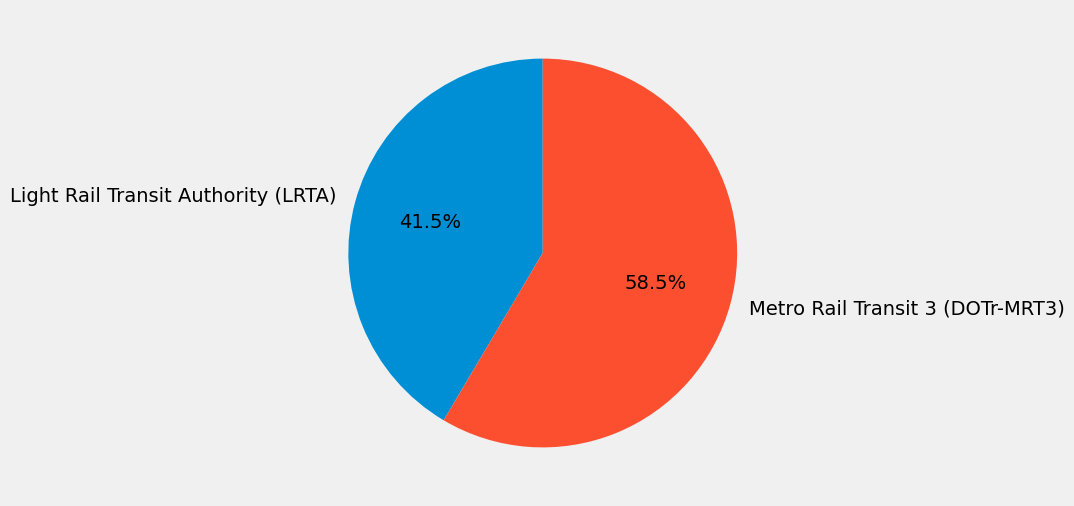

In [14]:
style.use("fivethirtyeight")
plot_univariate("Organization", "pie", 0)

In [15]:
def rename_emp_type(value):
  if value == "Job Order/Contract of Service":
    return "JO/COS"
  elif value == "Permanent":
    return "Permanent"
  elif value == "Contractual":
    return "Contractual"
  else:
    return None

retention_df["emp_type"] = retention_df["NatureofEmployment"].apply(rename_emp_type)

Text(0.5, 1.0, 'Railway Workforce Percentage by Nature of Employment \n')

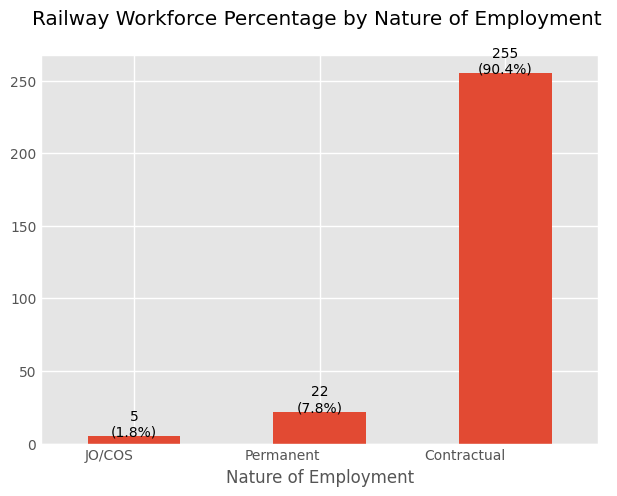

In [16]:
style.use("ggplot")
plot_univariate("emp_type", "bar", angle=0)
plt.xlabel("Nature of Employment")
plt.title("Railway Workforce Percentage by Nature of Employment \n")
# plt.ylabel("Population")

#**Bivariate Analysis**

### **Gender Distribution**

In [17]:
retention_df.columns

Index(['Age', 'Sex', 'HighestEducationalAttainment', 'YearsofService',
       'Occupation', 'Organization', 'NatureofEmployment', 'JF1', 'JF2', 'JL1',
       'JL2', 'JS1', 'JS2', 'CF1', 'CF2', 'CL1', 'CL2', 'CS1', 'CS2', 'ICP1',
       'ICP2', 'ICP3', 'ICP4', 'CT1', 'CT2', 'CT3', 'CT4', 'CT5', 'CT6', 'D1',
       'D2', 'D3', 'D4', 'D5', 'RM1', 'RM2', 'RM3', 'RM4', 'RM5', 'RM6', 'RM7',
       'RM8', 'RM9', 'RM10', 'RM11', 'ITL1', 'ITS1', 'ITS2', 'ITS3', 'ITS4',
       'ITL2', 'ITS5', 'ITS6', 'ITL3', 'education', 'Tenure', 'emp_type'],
      dtype='object')

In [18]:
def plot_sex_distrib(feature, data=retention_df):
  gender_employment_nature = retention_df.groupby(["Sex", feature]).size().reset_index(name="Count")
  total_count = gender_employment_nature["Count"].sum()
  gender_employment_nature["Percentage"] = (gender_employment_nature["Count"] / total_count) * 100
  fig, ax = plt.subplots(figsize=(8, 6))
  sns.barplot(data=gender_employment_nature, x=feature, y="Count", hue="Sex", ax=ax)

  # place percentage per plot
  for p in ax.patches:
    height = p.get_height()
    if height == 0:
      return None
    else:
      ax.annotate(f"{height/total_count:.1%}",  # Convert to percentage format
                  (p.get_x() + p.get_width() / 2., height),  # Positioning
                  ha='center', va='bottom', fontsize=10, color='black')

Text(0, 0.5, 'Population')

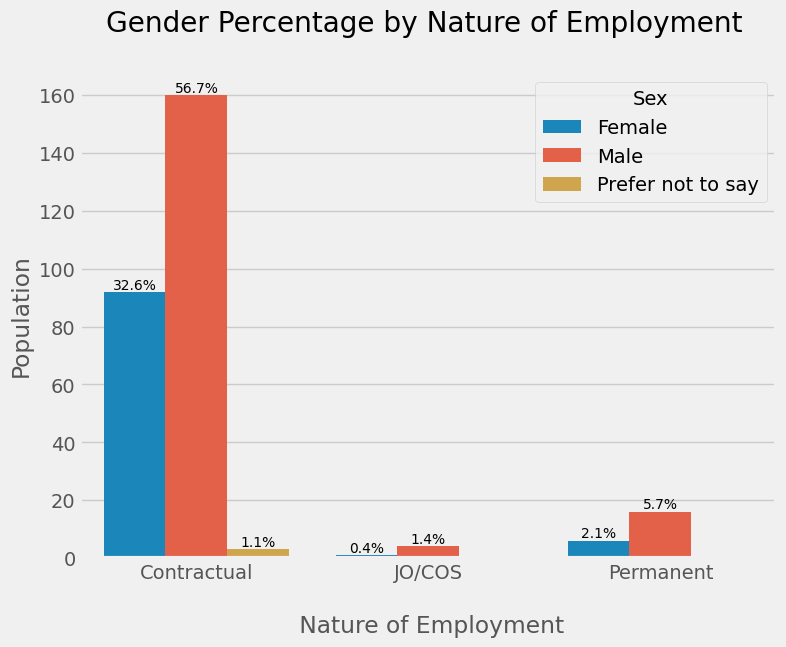

In [19]:
style.use("fivethirtyeight")
plot_sex_distrib("emp_type")
plt.title("Gender Percentage by Nature of Employment \n")
plt.xlabel("\n Nature of Employment")
plt.ylabel("Population")

Text(0, 0.5, 'Population')

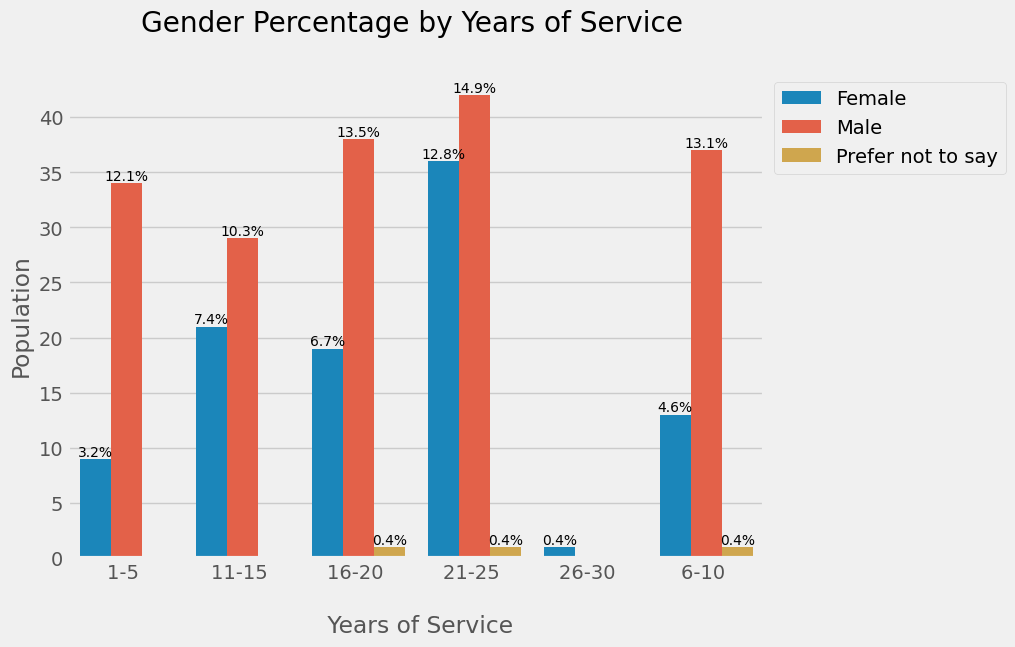

In [20]:
plot_sex_distrib("Tenure")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Gender Percentage by Years of Service \n")
plt.xlabel("\n Years of Service")
plt.ylabel("Population")

In [21]:
retention_df.columns

Index(['Age', 'Sex', 'HighestEducationalAttainment', 'YearsofService',
       'Occupation', 'Organization', 'NatureofEmployment', 'JF1', 'JF2', 'JL1',
       'JL2', 'JS1', 'JS2', 'CF1', 'CF2', 'CL1', 'CL2', 'CS1', 'CS2', 'ICP1',
       'ICP2', 'ICP3', 'ICP4', 'CT1', 'CT2', 'CT3', 'CT4', 'CT5', 'CT6', 'D1',
       'D2', 'D3', 'D4', 'D5', 'RM1', 'RM2', 'RM3', 'RM4', 'RM5', 'RM6', 'RM7',
       'RM8', 'RM9', 'RM10', 'RM11', 'ITL1', 'ITS1', 'ITS2', 'ITS3', 'ITS4',
       'ITL2', 'ITS5', 'ITS6', 'ITL3', 'education', 'Tenure', 'emp_type'],
      dtype='object')

In [22]:
def classify_job_level(position):

    if isinstance(position, str):
      position = position.lower()  # Convert to lowercase for case-insensitive matching
      if "supervisor" in position or " a" in position:
          return "Managerial"
      elif "senior" in position or "iii" in position or "3" in position or "stdo" in position or "b" in position:
          return "Senior"
      elif "c" in position:
          return "Junior"
      else:
          return "Junior"
    else:
      return "Unknown"

retention_df["Job Level"] = retention_df["Occupation"].apply(classify_job_level)

In [23]:
retention_df[["Occupation", "Job Level"]].sample(3)

,Occupation,Job Level
165,Transport Operation Supervisor B,Managerial
30,Employee,Junior
6,Train driver,Junior


Text(0, 0.5, 'Population')

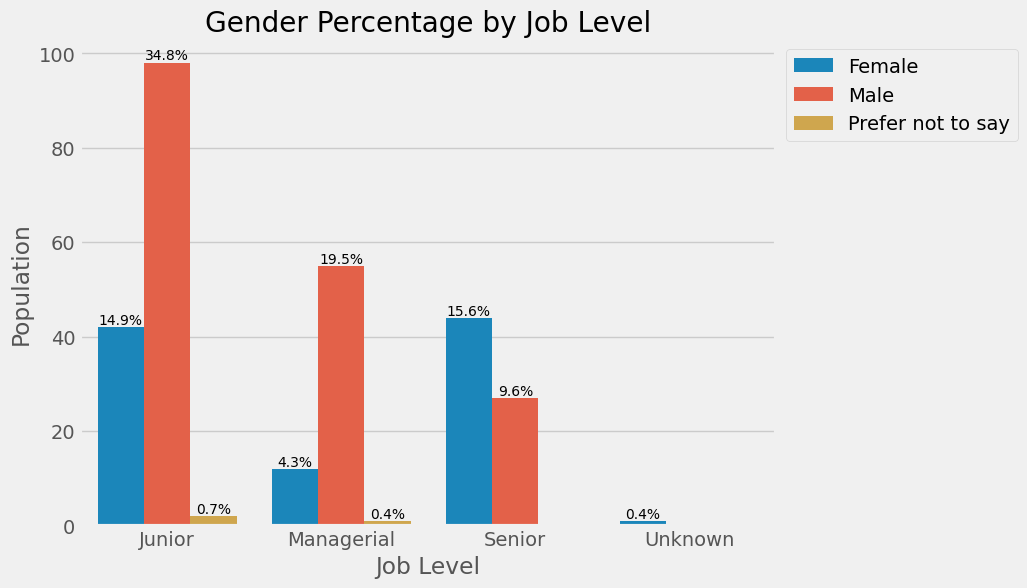

In [24]:
plot_sex_distrib("Job Level")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Gender Percentage by Job Level")
plt.xlabel("Job Level")
plt.ylabel("Population")

Text(0, 0.5, 'Population')

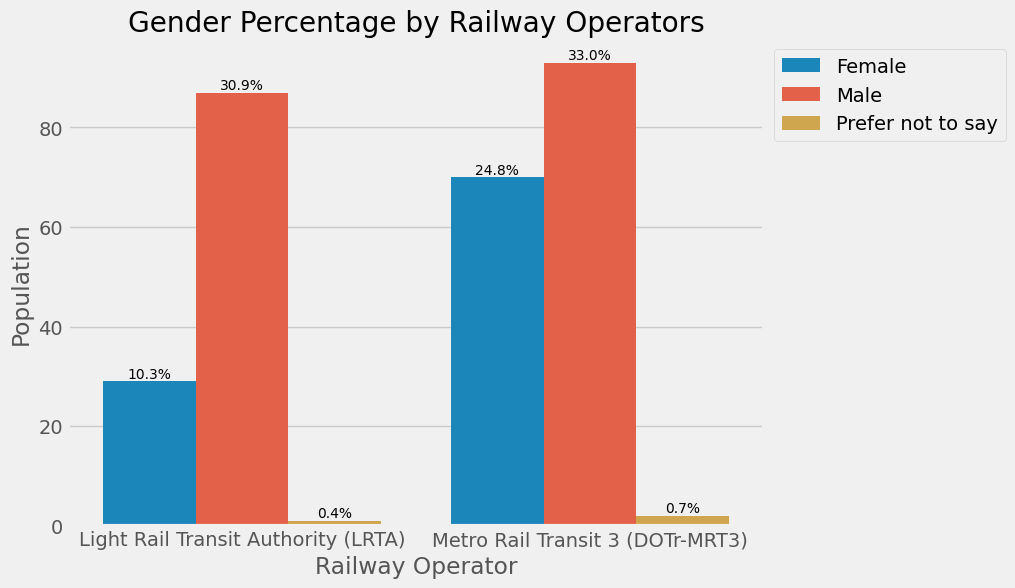

In [25]:
plot_sex_distrib("Organization")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Gender Percentage by Railway Operators")
plt.xlabel("Railway Operator")
plt.ylabel("Population")

Text(0.5, 1.0, 'Gender Percentage by Educational Level \n')

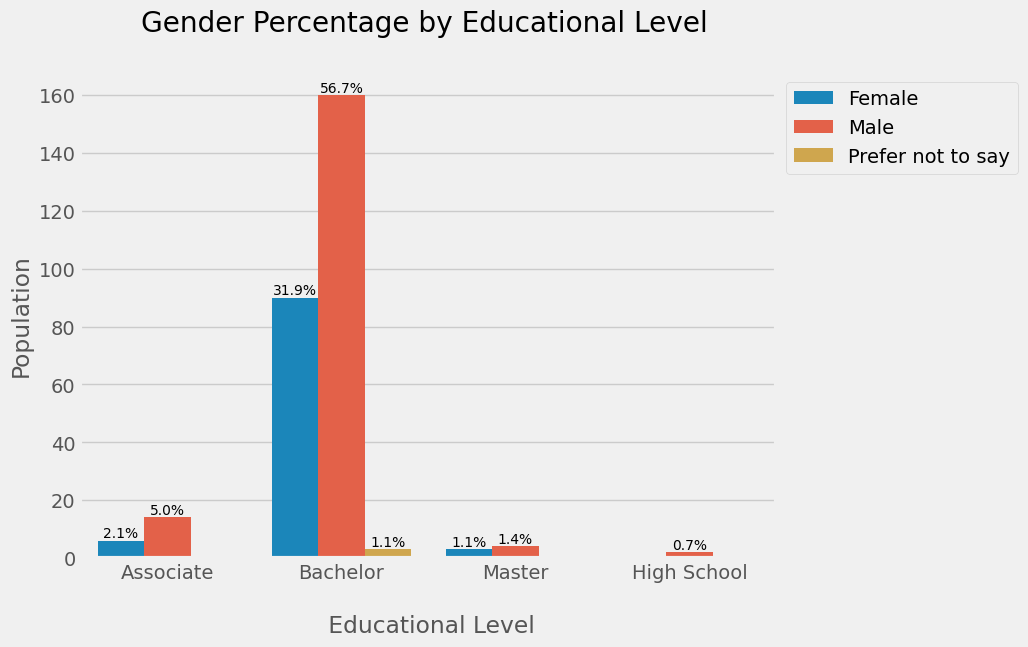

In [26]:
plot_sex_distrib("education")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Population")
plt.xlabel("\n Educational Level")
plt.title("Gender Percentage by Educational Level \n")

### **Education**

In [27]:
def plot_educ_distrib(feature, data=retention_df):
  gender_employment_nature = retention_df.groupby(["HighestEducationalAttainment", feature]).size().reset_index(name="Count")
  total_count = gender_employment_nature["Count"].sum()
  gender_employment_nature["Percentage"] = (gender_employment_nature["Count"] / total_count) * 100
  fig, ax = plt.subplots(figsize=(8, 6))
  sns.barplot(data=gender_employment_nature, x=feature, y="Count", hue="HighestEducationalAttainment", ax=ax)

  # place percentage per plot
  for p in ax.patches:
    height = p.get_height()
    if height == 0:
      return None
    else:
      ax.annotate(f"{height/total_count:.1%}",  # Convert to percentage format
                  (p.get_x() + p.get_width() / 2., height),  # Positioning
                  ha='center', va='bottom', fontsize=10, color='black')

In [28]:
retention_df.columns

Index(['Age', 'Sex', 'HighestEducationalAttainment', 'YearsofService',
       'Occupation', 'Organization', 'NatureofEmployment', 'JF1', 'JF2', 'JL1',
       'JL2', 'JS1', 'JS2', 'CF1', 'CF2', 'CL1', 'CL2', 'CS1', 'CS2', 'ICP1',
       'ICP2', 'ICP3', 'ICP4', 'CT1', 'CT2', 'CT3', 'CT4', 'CT5', 'CT6', 'D1',
       'D2', 'D3', 'D4', 'D5', 'RM1', 'RM2', 'RM3', 'RM4', 'RM5', 'RM6', 'RM7',
       'RM8', 'RM9', 'RM10', 'RM11', 'ITL1', 'ITS1', 'ITS2', 'ITS3', 'ITS4',
       'ITL2', 'ITS5', 'ITS6', 'ITL3', 'education', 'Tenure', 'emp_type',
       'Job Level'],
      dtype='object')

**Education vs Years of Service**

Text(0, 0.5, 'Population')

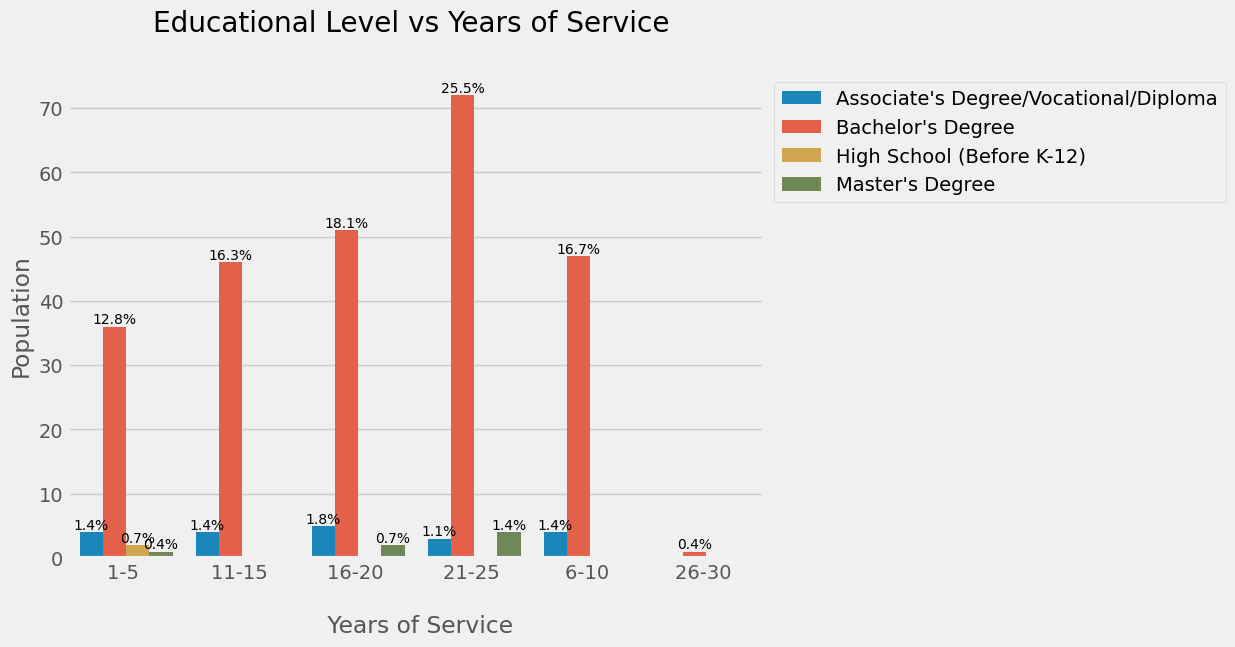

In [29]:
# style.use("fivethirtyw")
plot_educ_distrib("Tenure")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Educational Level vs Years of Service \n")
plt.xlabel("\n Years of Service")
plt.ylabel("Population")

**Education vs Job Level**

Text(0, 0.5, 'Population')

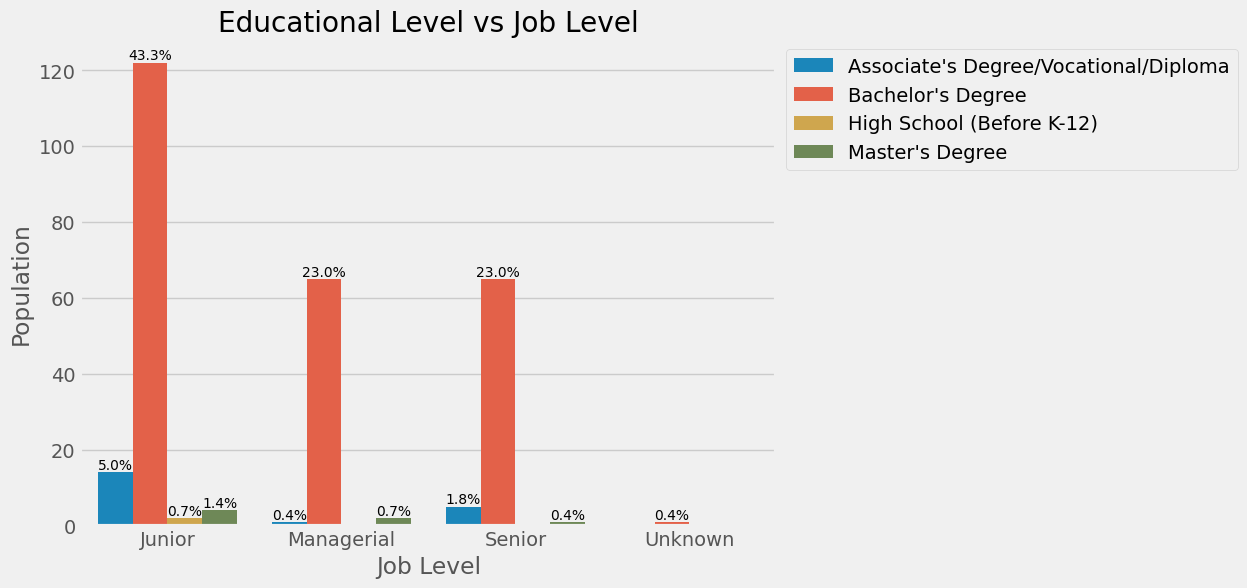

In [30]:
plot_educ_distrib("Job Level")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Educational Level vs Job Level")
plt.xlabel("Job Level")
plt.ylabel("Population")

**Education vs. Nature of Employment**

Text(0, 0.5, 'Population')

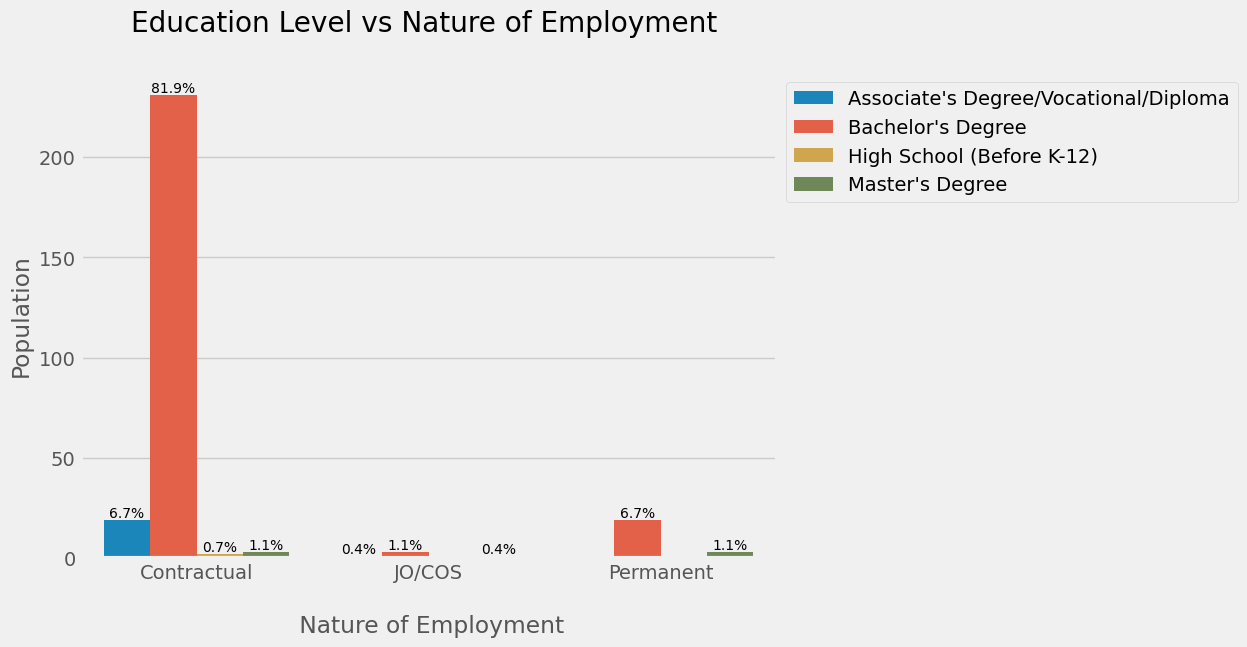

In [31]:
plot_educ_distrib("emp_type")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Education Level vs Nature of Employment \n")
plt.xlabel("\n Nature of Employment")
plt.ylabel("Population")

In [32]:
# --error

# **Multivariate Analysis**

<ipython-input-33-404ad24b625c>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  fig = sns.catplot(emp_educ_years,


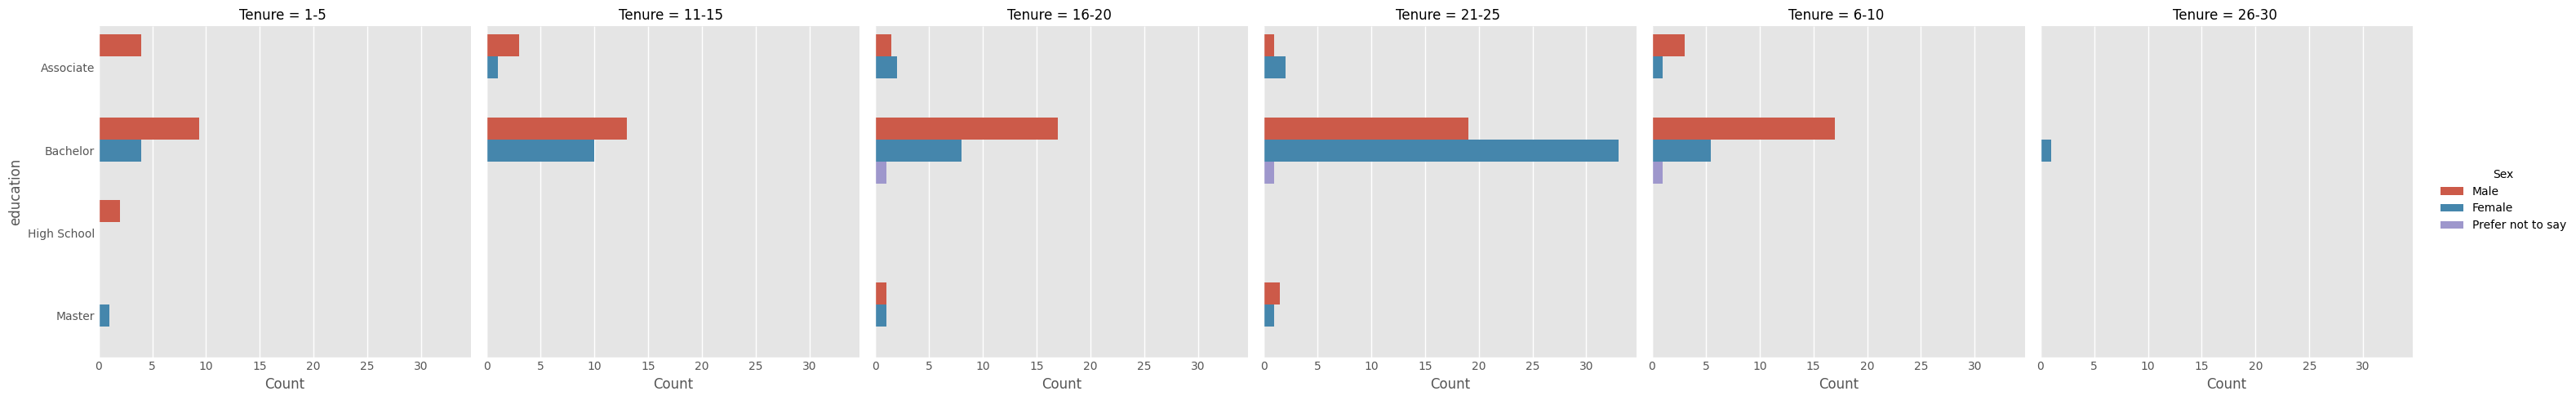

In [33]:
emp_educ_years = retention_df.groupby(["emp_type", "education", "Tenure", "Sex"]).count()["Occupation"].reset_index()
emp_educ_years.rename(columns={"Occupation":"Count"}, inplace=True)
style.use("ggplot")
fig = sns.catplot(emp_educ_years,
                  y="education",
                  col="Tenure",
                  x="Count",
                  kind="bar",
                  # height=4, aspect=.8, col_wrap=8,
                  ci=False,
                  hue="Sex")
# plt.xlabel("Population")

<ipython-input-34-b0c25963c089>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  fig = sns.catplot(emp_educ_years,


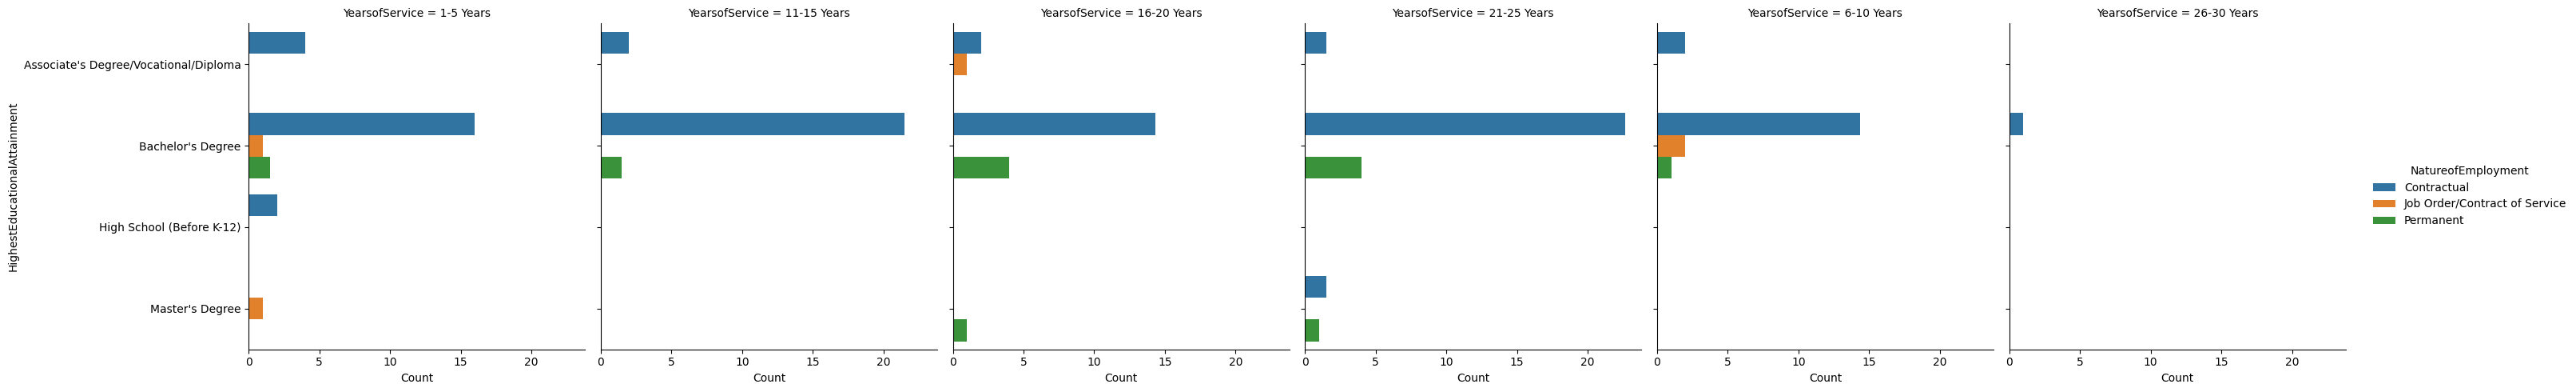

In [34]:
emp_educ_years = retention_df.groupby(["NatureofEmployment", "HighestEducationalAttainment", "YearsofService", "Sex"]).count()["Occupation"].reset_index()
emp_educ_years.rename(columns={"Occupation":"Count"}, inplace=True)
style.use("default")
fig = sns.catplot(emp_educ_years,
                  y="HighestEducationalAttainment",
                  col="YearsofService",
                  x="Count",
                  kind="bar",
                  ci=False,
                  # height=4, aspect=.8, col_wrap=8,
                  hue="NatureofEmployment")

# Insights


- **Education**: The majority (89.7%) of railway sector employees hold a Bachelor's degree, followed by those with vocational/associate degrees. Only 2.5% (7 personnel) have a Master’s degree.
- **Years of Service**: Over 80% of employees have been in service for 5 to 25 years, while only 0.4% have served for more than 26 years.
- **Employment Type**: A significant 90.4% of the workforce are contractual personnel, with only 7.8% (22 staff) holding permanent positions.

In [35]:
# --error

# **Feature Engineering**

In [36]:
def convert_scale(value):
  if (value == 5) or (value == 4):
    return 1
  # elif (value == 3):
  #   return 0
  elif (value == 3) or (value == 2) or (value == 1):
    return 0
  else:
    return 0

In [37]:
retention_features = retention_df[['JF1', 'JF2', 'JL1',
       'JL2', 'JS1', 'JS2', 'CF1', 'CF2', 'CL1', 'CL2', 'CS1', 'CS2', 'ICP1',
       'ICP2', 'ICP3', 'ICP4', 'CT1', 'CT2', 'CT3', 'CT4', 'CT5', 'CT6', 'D1',
       'D2', 'D3', 'D4', 'D5', 'RM1', 'RM2', 'RM3', 'RM4', 'RM5', 'RM6', 'RM7',
       'RM8', 'RM9', 'RM10', 'RM11', 'ITL1', 'ITS1', 'ITS2', 'ITS3', 'ITS4',
       'ITL2', 'ITS5', 'ITS6', 'ITL3']]

ret_feat_process = retention_features.applymap(convert_scale)
ret_feat_process.head()

<ipython-input-37-c101e02d3920>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ret_feat_process = retention_features.applymap(convert_scale)


,JF1,JF2,JL1,JL2,JS1,JS2,CF1,CF2,CL1,CL2,...,RM11,ITL1,ITS1,ITS2,ITS3,ITS4,ITL2,ITS5,ITS6,ITL3
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,0,0,1,1,0
2,1,1,0,1,1,1,0,0,0,0,...,1,1,1,1,1,0,0,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,0,1,0,1,0,0,1,1,0
4,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,0,1,1,0


In [38]:
ret_feat_process.shape

(282, 47)

In [39]:
retention_df.columns

Index(['Age', 'Sex', 'HighestEducationalAttainment', 'YearsofService',
       'Occupation', 'Organization', 'NatureofEmployment', 'JF1', 'JF2', 'JL1',
       'JL2', 'JS1', 'JS2', 'CF1', 'CF2', 'CL1', 'CL2', 'CS1', 'CS2', 'ICP1',
       'ICP2', 'ICP3', 'ICP4', 'CT1', 'CT2', 'CT3', 'CT4', 'CT5', 'CT6', 'D1',
       'D2', 'D3', 'D4', 'D5', 'RM1', 'RM2', 'RM3', 'RM4', 'RM5', 'RM6', 'RM7',
       'RM8', 'RM9', 'RM10', 'RM11', 'ITL1', 'ITS1', 'ITS2', 'ITS3', 'ITS4',
       'ITL2', 'ITS5', 'ITS6', 'ITL3', 'education', 'Tenure', 'emp_type',
       'Job Level'],
      dtype='object')

In [40]:
gender = pd.get_dummies(retention_df["Sex"])
age = pd.get_dummies(retention_df["Age"])
nature = pd.get_dummies(retention_df["emp_type"])
educ = pd.get_dummies(retention_df["education"])
years = pd.get_dummies(retention_df["Tenure"])
joblvl = pd.get_dummies(retention_df["Job Level"])

In [41]:
new_ret_df = pd.concat([gender, age, nature, educ, years, joblvl, ret_feat_process], axis=1)
new_ret_df.head()

,Female,Male,Prefer not to say,21-25,26-30,31-35,36-40,41-45,46-50,51-55,...,RM11,ITL1,ITS1,ITS2,ITS3,ITS4,ITL2,ITS5,ITS6,ITL3
0,False,True,False,False,False,False,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,False,True,False,False,False,False,False,False,True,False,...,0,0,1,1,1,0,0,1,1,0
2,False,True,False,False,False,False,True,False,False,False,...,1,1,1,1,1,0,0,1,1,1
3,False,True,False,False,False,False,False,False,True,False,...,1,0,1,0,1,0,0,1,1,0
4,False,True,False,False,True,False,False,False,False,False,...,1,0,1,1,1,1,0,1,1,0


# **Modeling Part 1: TM Level Cluster Analysis**

In [42]:
# import kmeans and dbscan
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

### **Elbow Method**

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

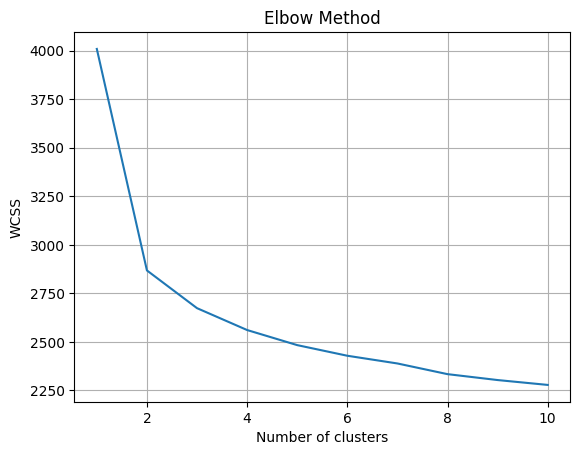

In [43]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(new_ret_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.grid()
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### **KMeans Cluster Algorithm**

In [44]:
# Fit kmeans
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(new_ret_df)
new_ret_df["kmeans_grp"] = y_kmeans

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [45]:
new_ret_df.columns

Index(['Female', 'Male', 'Prefer not to say', '21-25', '26-30', '31-35',
       '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', 'Contractual',
       'JO/COS', 'Permanent', 'Associate', 'Bachelor', 'High School', 'Master',
       '1-5 ', '11-15 ', '16-20 ', '21-25 ', '26-30 ', '6-10 ', 'Junior',
       'Managerial', 'Senior', 'Unknown', 'JF1', 'JF2', 'JL1', 'JL2', 'JS1',
       'JS2', 'CF1', 'CF2', 'CL1', 'CL2', 'CS1', 'CS2', 'ICP1', 'ICP2', 'ICP3',
       'ICP4', 'CT1', 'CT2', 'CT3', 'CT4', 'CT5', 'CT6', 'D1', 'D2', 'D3',
       'D4', 'D5', 'RM1', 'RM2', 'RM3', 'RM4', 'RM5', 'RM6', 'RM7', 'RM8',
       'RM9', 'RM10', 'RM11', 'ITL1', 'ITS1', 'ITS2', 'ITS3', 'ITS4', 'ITL2',
       'ITS5', 'ITS6', 'ITL3', 'kmeans_grp'],
      dtype='object')

### **Data Compression**

In [46]:
retention_preprocess = pd.DataFrame({})
# Data Reduction
# Job Embeddedness Feat Engineering
retention_preprocess["JF"] = ret_feat_process["JF1"] + ret_feat_process["JF2"]
retention_preprocess["JL"] = ret_feat_process["JL1"] + ret_feat_process["JL2"]
retention_preprocess["JS"] = ret_feat_process["JS1"] + ret_feat_process["JS2"]
retention_preprocess["CF"] = ret_feat_process["CF1"] + ret_feat_process["CF2"]
retention_preprocess["CL"] = ret_feat_process["CL1"] + ret_feat_process["CL2"]
retention_preprocess["CS"] = ret_feat_process["CS1"] + ret_feat_process["CS2"]

# JE Class encoded
retention_preprocess['JE_dep'] = retention_preprocess[['JF', 'JL', 'JS', 'CF', 'CL', 'CS']].astype(str).apply(lambda x: ''.join(x), axis=1)

# JE Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
retention_preprocess["JE_cat"] = le.fit_transform(retention_preprocess["JE_dep"])
retention_preprocess["JE_cat"].unique()

array([ 17, 120,  83, 119,  79,  84,  20,  52,  59, 110, 108,  14,   0,
       102, 101, 117,  56,  30,  86,  16,   7,  94,  96,  95,  34, 109,
        90,  89, 111, 116,  87,  41, 112,  98,  18,  23, 114,  91,  65,
        93, 107,  80, 115,  64,  27,   4,  58,  28,  36,  70,  46, 113,
        31,   3,  25,   9,  40,  51,  50,  21,  68,  57,  47,  19,  37,
        24,  38,  39,  13,  92,  43,  45,  11,  77,  26,  55,  74,   1,
        53,  81,  75,  42,   6,  60,  54,  67,  49,  88, 106,  22, 118,
        76,  15,  73,  85,   5,  35,  44,  66, 103, 105,  48, 104,  61,
        78,  33,  97,  82,  72,  62,  69, 100,  71,  32,  29,  12,  99,
        10,   8,  63,   2])

In [47]:
new_ret_df["JE_cat"] = retention_preprocess["JE_cat"]
new_ret_df["JE_dep"] = retention_preprocess["JE_dep"]

### **Chi-square test of Independence (TM level vs JE)**

In [48]:
!pip install pingouin

In [49]:
# chi-square test of independence between JE_cat and kmeans_grp using pingouin
# signifance or alpha = 0.05
import pingouin as pg
exp, obs, stats = pg.chi2_independence(new_ret_df, x='JE_cat', y='kmeans_grp')
# print()
pd.DataFrame(stats[stats['test'] == 'pearson'])

/usr/local/lib/python3.11/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/usr/local/lib/python3.11/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:7994: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:7994: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:7991: RuntimeWarning: divide by zero encountered in divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.0,221.191682,120.0,5.366386e-08,0.885645,1.0


1. Test (pearson):
The type of test conducted is Pearson’s Chi-Square test, which is standard for testing independence.

2. Lambda (1.0):
The value of lambda is typically associated with effect size or measures of association. In this case, it seems set to 1.0, possibly reflecting perfect association.

3. Chi2 (221.1916825):
This is the Chi-Square test statistic. A higher value indicates that the observed and expected frequencies differ significantly if they are independent.

4. DOF (30.0):
Degrees of Freedom, calculated as
(
rows
−
1
)
×
(
columns
−
1
)
(rows−1)×(columns−1), reflect the number of independent comparisons in the dataset.

5. pval (5.36e-08): This is the p-value. Since 𝑝 (0.05) p < 0.05, the result is statistically significant, meaning there is evidence to reject the null hypothesis (H₀). This suggests that the two variables are not independent and are associated.

5. Cramer (0.673168):
Cramér's V is a measure of the strength of association between two categorical variables:

- 0 to 0.1: Weak association
- 0.1 to 0.3: Moderate association

 Above 0.3: Strong association
Here, 0.673 indicates a strong association between the variables.
Power (1.0):
Statistical power represents the likelihood of detecting an effect if there is one. A value of 1.0 means the test had enough power to detect significant associations.

The variables in the analysis are strongly associated with each other (based on Cramér's V) and the relationship is statistically significant (
𝑝
<
0.05
p<0.05). This implies that the two variables are likely dependent.

Would you like help interpreting what this means in the context of your data?

### **Analyze the relation of talent management clusters to job embeddedness**

In [50]:
retention_df.columns

Index(['Age', 'Sex', 'HighestEducationalAttainment', 'YearsofService',
       'Occupation', 'Organization', 'NatureofEmployment', 'JF1', 'JF2', 'JL1',
       'JL2', 'JS1', 'JS2', 'CF1', 'CF2', 'CL1', 'CL2', 'CS1', 'CS2', 'ICP1',
       'ICP2', 'ICP3', 'ICP4', 'CT1', 'CT2', 'CT3', 'CT4', 'CT5', 'CT6', 'D1',
       'D2', 'D3', 'D4', 'D5', 'RM1', 'RM2', 'RM3', 'RM4', 'RM5', 'RM6', 'RM7',
       'RM8', 'RM9', 'RM10', 'RM11', 'ITL1', 'ITS1', 'ITS2', 'ITS3', 'ITS4',
       'ITL2', 'ITS5', 'ITS6', 'ITL3', 'education', 'Tenure', 'emp_type',
       'Job Level'],
      dtype='object')

In [51]:
ret_demographics = retention_df[['Age', 'Sex', 'education', 'Tenure','Occupation', 'Organization', 'emp_type', 'Job Level']]
ret_kmeans = new_ret_df[["kmeans_grp", "JE_dep", "JE_cat"]]

def decode_label(value):
  if value == 1:
    return "High"
  else:
    return "Low"

ret_kmeans["TM Level"] = ret_kmeans["kmeans_grp"].apply(decode_label)
# ret_kmeans.drop("JE Label", inplace=True, axis=1)
retention_JE = pd.concat([ret_demographics, ret_kmeans["TM Level"]], axis=1)
# retention_JE.head()

<ipython-input-51-bfe3882e53d4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ret_kmeans["TM Level"] = ret_kmeans["kmeans_grp"].apply(decode_label)


,Age,Sex,education,Tenure,Occupation,Organization,emp_type,Job Level,TM Level
0,36-40,Male,Bachelor,11-15,Government Employee,Light Rail Transit Authority (LRTA),Permanent,Junior,Low
1,46-50,Male,Bachelor,16-20,Tranport operations Supervisor B,Light Rail Transit Authority (LRTA),Contractual,Managerial,Low
2,36-40,Male,Bachelor,11-15,Transport Operations Supervisor B,Light Rail Transit Authority (LRTA),Contractual,Managerial,High
3,46-50,Male,Bachelor,16-20,Transport Operations Supervisor B,Light Rail Transit Authority (LRTA),Contractual,Managerial,High
4,26-30,Male,Bachelor,6-10,Train Driver A,Light Rail Transit Authority (LRTA),Contractual,Managerial,High


In [52]:
# shorten organization feature
def shorten_org(value):
  if value == "Light Rail Transit Authority (LRTA)":
    return "LRTA"
  else:
    return "MRT3"

retention_JE["org"] = retention_JE["Organization"].apply(shorten_org)

<ipython-input-53-a2d60769efa7>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.catplot(JE_gender_org,


Text(611.1066440972223, 0.5, 'Population')

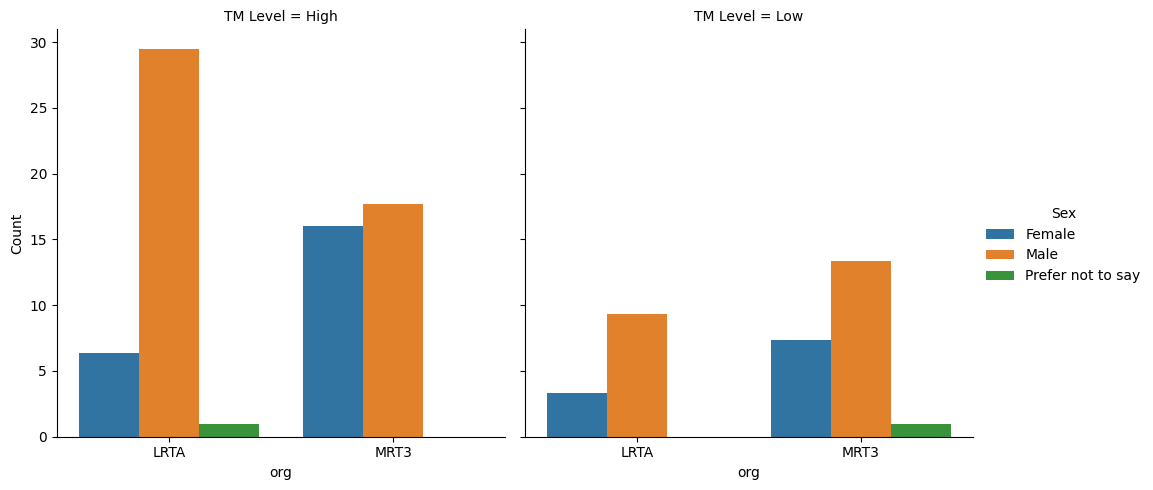

In [53]:
JE_gender_org = retention_JE.groupby(["Sex",
                                      "org",
                                      "TM Level",
                                      "Job Level"]).count()["Age"].reset_index(name="Count")
sns.catplot(JE_gender_org,
            x="org",
            y="Count",
            hue="Sex",
            col="TM Level",
            # row="Job Level",
            kind="bar",
            ci=False)
plt.ylabel("Population")

Text(601.5940104166667, 0.5, 'Population')

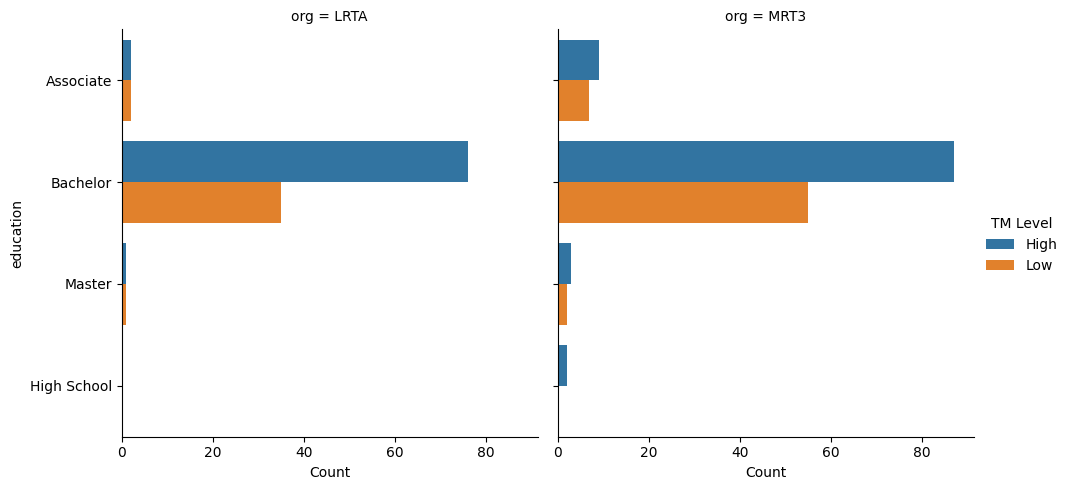

In [54]:
JE_gender_org = retention_JE.groupby(["org",
                                      "education",
                                      "TM Level"]).count()["Age"].reset_index(name="Count")

sns.catplot(JE_gender_org,
            x="Count",
            y="education",
            hue="TM Level",
            col="org",
            kind="bar")
plt.ylabel("Population")

In [55]:
# retention_JE.groupby(["YearsofService",
#                       "JE Level"]).count()["Age"].reset_index(name="Count")

In [56]:
# retention_JE.groupby(["Job Level",
#                       "JE Level"]).count()["Age"].reset_index(name="Count")

In [57]:
# retention_JE.groupby(["NatureofEmployment",
#                       "JE Level"]).count()["Age"].reset_index(name="Count")

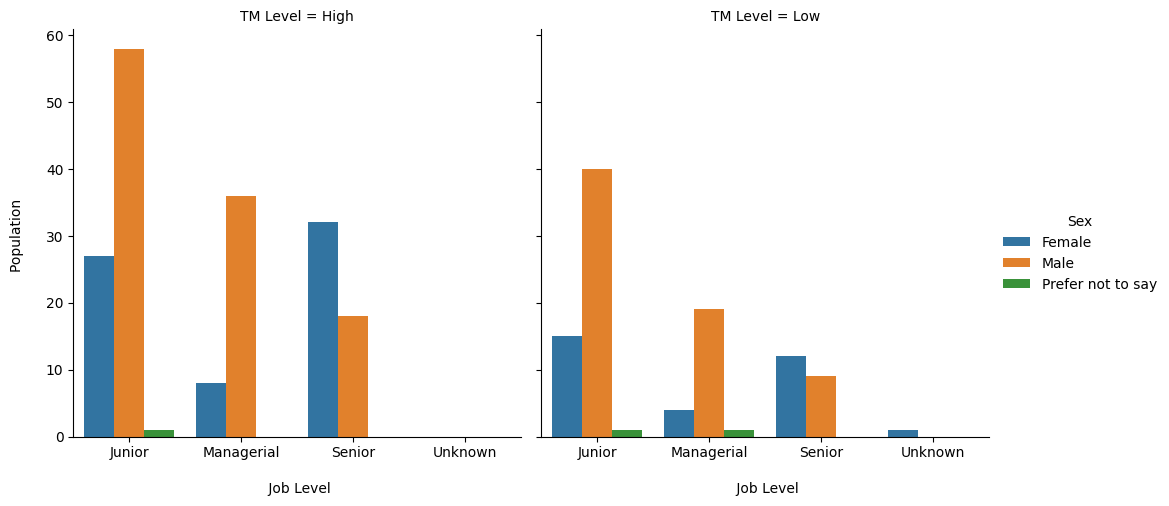

In [58]:
JE_sex = retention_JE.groupby(["Sex",
                               "TM Level",
                               "Job Level"]).count()["Age"].reset_index(name="Count")
# style.use("default")
fig = sns.catplot(JE_sex,
            x="Job Level",
            y="Count",
            hue="Sex",
            col="TM Level",
            kind="bar")
fig.set_ylabels("Population \n")
fig.set_xlabels("\n Job Level")

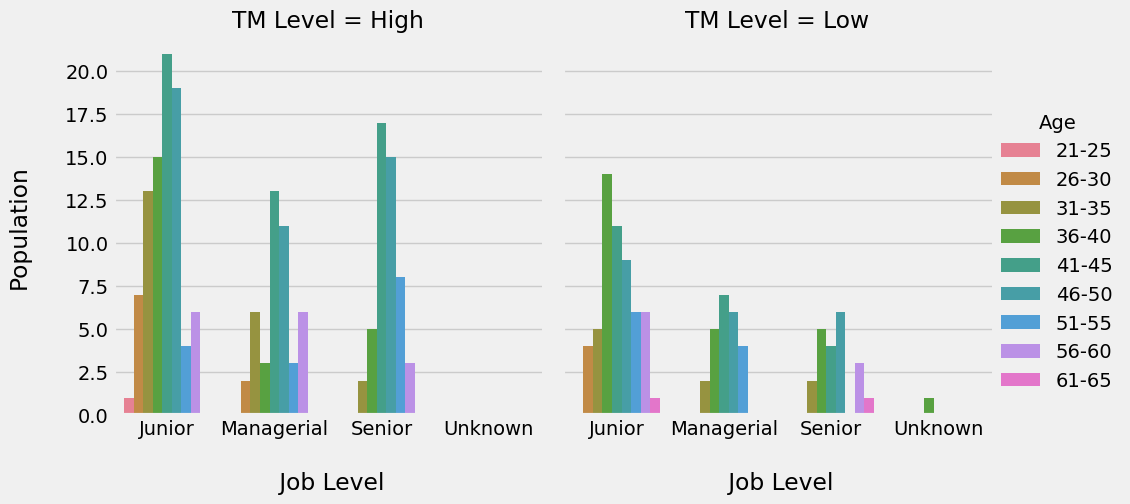

In [59]:
JE_age = retention_JE.groupby(["Age",
                               "TM Level",
                               "Job Level"]).count()["Sex"].reset_index(name="Count")
style.use("fivethirtyeight")
fig = sns.catplot(JE_age,
            x="Job Level",
            y="Count",
            hue="Age",
            col="TM Level",
            kind="bar")

fig.set_ylabels("Population \n")
fig.set_xlabels("\n Job Level")

Text(0.5, 44.000000000000014, 'Job Level')

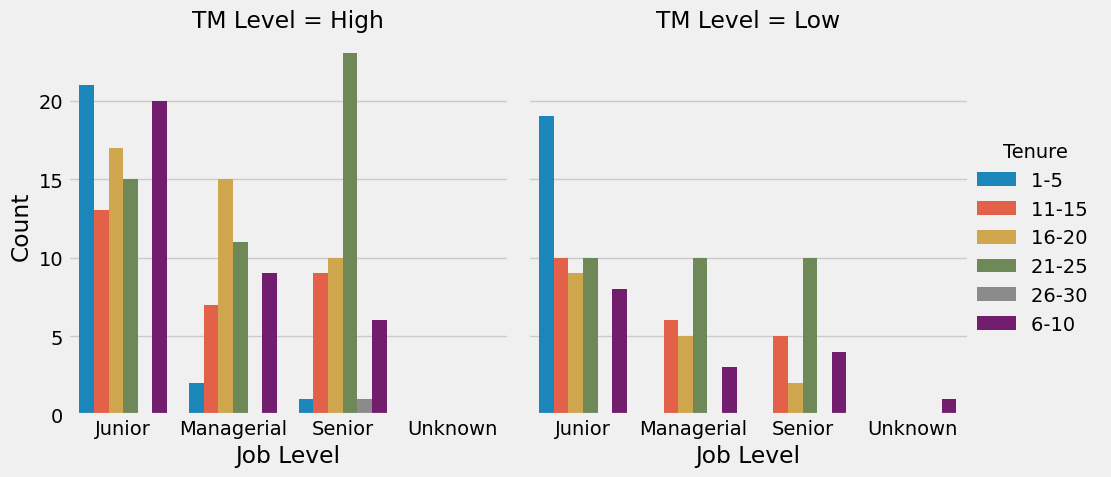

In [60]:
JE_tenure = retention_JE.groupby(["Tenure",
                               "TM Level",
                               "Job Level"]).count()["Sex"].reset_index(name="Count")
style.use("fivethirtyeight")
sns.catplot(JE_tenure,
            x="Job Level",
            y="Count",
            hue="Tenure",
            col="TM Level",
            kind="bar")

plt.ylabel("Population")
plt.xlabel("Job Level")

In [61]:
ret_feat_process

,JF1,JF2,JL1,JL2,JS1,JS2,CF1,CF2,CL1,CL2,...,RM11,ITL1,ITS1,ITS2,ITS3,ITS4,ITL2,ITS5,ITS6,ITL3
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,0,0,1,1,0
2,1,1,0,1,1,1,0,0,0,0,...,1,1,1,1,1,0,0,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,0,1,0,1,0,0,1,1,0
4,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,0,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
278,1,1,0,0,1,1,0,0,0,0,...,1,0,1,1,0,1,0,1,1,1
279,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
280,1,1,0,1,1,1,1,0,1,1,...,1,1,1,1,1,1,0,1,1,1


In [62]:
retention_JE

,Age,Sex,education,Tenure,Occupation,Organization,emp_type,Job Level,TM Level,org
0,36-40,Male,Bachelor,11-15,Government Employee,Light Rail Transit Authority (LRTA),Permanent,Junior,Low,LRTA
1,46-50,Male,Bachelor,16-20,Tranport operations Supervisor B,Light Rail Transit Authority (LRTA),Contractual,Managerial,Low,LRTA
2,36-40,Male,Bachelor,11-15,Transport Operations Supervisor B,Light Rail Transit Authority (LRTA),Contractual,Managerial,High,LRTA
3,46-50,Male,Bachelor,16-20,Transport Operations Supervisor B,Light Rail Transit Authority (LRTA),Contractual,Managerial,High,LRTA
4,26-30,Male,Bachelor,6-10,Train Driver A,Light Rail Transit Authority (LRTA),Contractual,Managerial,High,LRTA
...,...,...,...,...,...,...,...,...,...,...
277,46-50,Female,Bachelor,21-25,Supervisor,Metro Rail Transit 3 (DOTr-MRT3),Contractual,Managerial,Low,MRT3
278,36-40,Male,Bachelor,11-15,Station Supervisor,Metro Rail Transit 3 (DOTr-MRT3),Contractual,Managerial,Low,MRT3
279,46-50,Female,Associate,21-25,Ticket Seller III,Metro Rail Transit 3 (DOTr-MRT3),Contractual,Senior,High,MRT3
280,41-45,Female,Bachelor,11-15,Ticket Seller 3,Metro Rail Transit 3 (DOTr-MRT3),Contractual,Senior,High,MRT3


# **Modeling Part 2: JE Level Cluster Analysis**

In [63]:
ret_feat_je = ret_feat_process[['JF1', 'JF2', 'JL1', 'JL2', 'JS1', 'JS2', 'CF1', 'CF2', 'CL1', 'CL2','CS1', 'CS2']]

In [64]:
# Fit kmeans
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(ret_feat_je)
# ret_feat_je["JE_kmeans_grp"] = y_kmeans

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [65]:
# fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(ret_feat_je)
# ret_feat_je["JE_dbscan_grp"] = y_dbscan

In [66]:
# Fit hierarchical clustering
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_hc = hc.fit_predict(ret_feat_je)
# ret_feat_je["JE_hc_grp"] = y_hc

In [67]:
# ret_feat_je["JE_kmeans_grp"] = pd.Series(y_kmeans).apply(decode_label)
# ret_feat_je["JE_dbscan_grp"] = pd.Series(y_dbscan).apply(decode_label)
# ret_feat_je["JE_hc_grp"] = pd.Series(y_hc).apply(decode_label)

ret_feat_process["JE_kmeans_grp"] = y_kmeans
ret_feat_process["JE_dbscan_grp"] = y_dbscan
ret_feat_process["JE_hc_grp"] = y_hc

<ipython-input-67-90d348d0e536>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ret_feat_je["JE_kmeans_grp"] = y_kmeans
<ipython-input-67-90d348d0e536>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ret_feat_je["JE_dbscan_grp"] = y_dbscan
<ipython-input-67-90d348d0e536>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [68]:
ret_feat_je.sample(3)

,JF1,JF2,JL1,JL2,JS1,JS2,CF1,CF2,CL1,CL2,CS1,CS2,JE_kmeans_grp,JE_dbscan_grp,JE_hc_grp
1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,2
198,1,1,1,1,1,1,1,1,1,1,1,1,1,0,2
22,0,1,0,0,1,1,1,0,1,1,1,1,1,-1,2


### **Chi-square test of independence (JE Level vs Employee Retention)**

In [162]:
def compute_likelihood_to_leave(df, col1_name, col2_name, col3_name):
    """
    Analyzes three columns of a DataFrame and returns a new column based on the criteria.

    Args:
      df: The input DataFrame.
      col1_name: The name of the first column.
      col2_name: The name of the second column.
      col3_name: The name of the third column.

    Returns:
      A pandas Series representing the new column with the results.
    """

    results = []
    for index, row in df.iterrows():
        col1_val = row[col1_name]
        col2_val = row[col2_name]
        col3_val = row[col3_name]

        ones_count = sum([col1_val == 1, col2_val == 1, col3_val == 1])
        zeros_count = sum([col1_val == 0, col2_val == 0, col3_val == 0])

        if ones_count >= 2:
            results.append(1)
        elif zeros_count >= 2:
            results.append(0)
        else:
          results.append(1) # Handle cases where neither condition is met

    return pd.Series(results)

In [163]:
# create new feature as a target variable: Likelihood to leave
new_ret_df["llh_to_leave"] = compute_likelihood_to_leave(new_ret_df, 'ITL1', 'ITS5', 'ITS6')

In [164]:
def chi_square_test(df, x, y):
  exp, obs, stats = pg.chi2_independence(df, x=x, y=y)
  # print()
  return pd.DataFrame(stats[stats['test'] == 'pearson'])

In [166]:
new_ret_df.columns

Index(['Female', 'Male', 'Prefer not to say', '21-25', '26-30', '31-35',
       '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', 'Contractual',
       'JO/COS', 'Permanent', 'Associate', 'Bachelor', 'High School', 'Master',
       '1-5 ', '11-15 ', '16-20 ', '21-25 ', '26-30 ', '6-10 ', 'Junior',
       'Managerial', 'Senior', 'Unknown', 'JF1', 'JF2', 'JL1', 'JL2', 'JS1',
       'JS2', 'CF1', 'CF2', 'CL1', 'CL2', 'CS1', 'CS2', 'ICP1', 'ICP2', 'ICP3',
       'ICP4', 'CT1', 'CT2', 'CT3', 'CT4', 'CT5', 'CT6', 'D1', 'D2', 'D3',
       'D4', 'D5', 'RM1', 'RM2', 'RM3', 'RM4', 'RM5', 'RM6', 'RM7', 'RM8',
       'RM9', 'RM10', 'RM11', 'ITL1', 'ITS1', 'ITS2', 'ITS3', 'ITS4', 'ITL2',
       'ITS5', 'ITS6', 'ITL3', 'TM level', 'TM lvl', 'llh_to_leave'],
      dtype='object')

In [167]:
new_ret_df["JE_kmeans_grp"] = ret_feat_je["JE_kmeans_grp"]
new_ret_df["JE_dbscan_grp"] = ret_feat_je["JE_dbscan_grp"]
new_ret_df["JE_hc_grp"] = ret_feat_je["JE_hc_grp"]
# new_ret_df["Retention grp"] = new_ret_df[['ITL1', 'ITS5', 'ITS6']].astype(str).apply(lambda x: ''.join(x), axis=1)

In [168]:
print(chi_square_test(new_ret_df, x="JE_kmeans_grp", y="llh_to_leave"))

      test  lambda       chi2  dof          pval    cramer  power
0  pearson     1.0  52.228579  2.0  4.557305e-12  0.430358    1.0


In [169]:
grps = ["JE_kmeans_grp", "JE_dbscan_grp", "JE_hc_grp"]

for grp in grps:
  print(chi_square_test(new_ret_df, x="llh_to_leave", y=grp))

      test  lambda       chi2  dof          pval    cramer  power
0  pearson     1.0  52.228579  2.0  4.557305e-12  0.430358    1.0
      test  lambda       chi2  dof          pval    cramer     power
0  pearson     1.0  57.370374  5.0  4.241679e-11  0.451044  0.999998
      test  lambda       chi2  dof          pval    cramer  power
0  pearson     1.0  64.671253  2.0  9.053488e-15  0.478885    1.0


/usr/local/lib/python3.11/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/usr/local/lib/python3.11/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:7994: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:7994: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:7991: RuntimeWarning: divide by zero encountered in divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


In [ ]:
# new_ret_df["JE level"] = ret_feat_je["JE Level"]
# exp, obs, stats = pg.chi2_independence(new_ret_df, x='ITL1', y='JE level')
# # print()
# pd.DataFrame(stats[stats['test'] == 'pearson'])

In [ ]:
new_ret_df

In [ ]:
# print(new_ret_df["JE level"].value_counts())
# print(new_ret_df["ITL1"].value_counts())
# new_ret_df.groupby(["JE_kmeans_grp", "ITL1"]).count()["ITL2"].reset_index(name="Count")

In [ ]:
new_ret_df.columns

# **Modeling Part 3: Predictive Analysis**

In [ ]:
!pip install catboost

In [73]:
# Import API for ML classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool
import pydot

In [74]:
ret_feat_process['TM level'] = retention_JE["TM Level"]

def to_binary(value):
  if value == "High":
    return True
  else:
    return False
# ret_feat_process["TM lvl"] = pd.get_dummies(ret_feat_process["TM level"], drop_first=True)
ret_feat_process["TM lvl"] = ret_feat_process["TM level"].apply(to_binary)
ret_feat_process.columns

Index(['JF1', 'JF2', 'JL1', 'JL2', 'JS1', 'JS2', 'CF1', 'CF2', 'CL1', 'CL2',
       'CS1', 'CS2', 'ICP1', 'ICP2', 'ICP3', 'ICP4', 'CT1', 'CT2', 'CT3',
       'CT4', 'CT5', 'CT6', 'D1', 'D2', 'D3', 'D4', 'D5', 'RM1', 'RM2', 'RM3',
       'RM4', 'RM5', 'RM6', 'RM7', 'RM8', 'RM9', 'RM10', 'RM11', 'ITL1',
       'ITS1', 'ITS2', 'ITS3', 'ITS4', 'ITL2', 'ITS5', 'ITS6', 'ITL3',
       'TM level', 'TM lvl'],
      dtype='object')

In [170]:
new_ret_df.columns

Index(['Female', 'Male', 'Prefer not to say', '21-25', '26-30', '31-35',
       '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', 'Contractual',
       'JO/COS', 'Permanent', 'Associate', 'Bachelor', 'High School', 'Master',
       '1-5 ', '11-15 ', '16-20 ', '21-25 ', '26-30 ', '6-10 ', 'Junior',
       'Managerial', 'Senior', 'Unknown', 'JF1', 'JF2', 'JL1', 'JL2', 'JS1',
       'JS2', 'CF1', 'CF2', 'CL1', 'CL2', 'CS1', 'CS2', 'ICP1', 'ICP2', 'ICP3',
       'ICP4', 'CT1', 'CT2', 'CT3', 'CT4', 'CT5', 'CT6', 'D1', 'D2', 'D3',
       'D4', 'D5', 'RM1', 'RM2', 'RM3', 'RM4', 'RM5', 'RM6', 'RM7', 'RM8',
       'RM9', 'RM10', 'RM11', 'ITL1', 'ITS1', 'ITS2', 'ITS3', 'ITS4', 'ITL2',
       'ITS5', 'ITS6', 'ITL3', 'TM level', 'TM lvl', 'llh_to_leave',
       'JE_kmeans_grp', 'JE_dbscan_grp', 'JE_hc_grp'],
      dtype='object')

In [172]:
je_cols = new_ret_df[['JE_kmeans_grp', 'JE_dbscan_grp', 'JE_hc_grp']]
new_ret_df = pd.concat([gender, age, nature, educ, years, joblvl, ret_feat_process], axis=1)
new_ret_df.head()

,Female,Male,Prefer not to say,21-25,26-30,31-35,36-40,41-45,46-50,51-55,...,ITS1,ITS2,ITS3,ITS4,ITL2,ITS5,ITS6,ITL3,TM level,TM lvl
0,False,True,False,False,False,False,True,False,False,False,...,0,0,0,0,0,0,0,0,Low,False
1,False,True,False,False,False,False,False,False,True,False,...,1,1,1,0,0,1,1,0,Low,False
2,False,True,False,False,False,False,True,False,False,False,...,1,1,1,0,0,1,1,1,High,True
3,False,True,False,False,False,False,False,False,True,False,...,1,0,1,0,0,1,1,0,High,True
4,False,True,False,False,True,False,False,False,False,False,...,1,1,1,1,0,1,1,0,High,True


In [ ]:
# ret_feat_process.drop(["TM level",	"TM low",	"TM high"], axis=1, inplace=True)
ret_feat_process.sample(5)

In [ ]:
new_ret_df.columns

In [ ]:
# var_y = ['JF1', 'JF2', 'JL1', 'JL2', 'JS1', 'JS2', 'CF1', 'CF2', 'CL1', 'CL2', 'CS1', 'CS2', 'ITS1']

# for var in var_y:
#   print(var, " ",chi_square_test(new_ret_df, x="ITL1", y=var))

In [76]:
# def compute_likelihood_to_leave(df, col1_name, col2_name, col3_name):
#     """
#     Analyzes three columns of a DataFrame and returns a new column based on the criteria.

#     Args:
#       df: The input DataFrame.
#       col1_name: The name of the first column.
#       col2_name: The name of the second column.
#       col3_name: The name of the third column.

#     Returns:
#       A pandas Series representing the new column with the results.
#     """

#     results = []
#     for index, row in df.iterrows():
#         col1_val = row[col1_name]
#         col2_val = row[col2_name]
#         col3_val = row[col3_name]

#         ones_count = sum([col1_val == 1, col2_val == 1, col3_val == 1])
#         zeros_count = sum([col1_val == 0, col2_val == 0, col3_val == 0])

#         if ones_count >= 2:
#             results.append(1)
#         elif zeros_count >= 2:
#             results.append(0)
#         else:
#           results.append(1) # Handle cases where neither condition is met

#     return pd.Series(results)

In [77]:
# # create new feature as a target variable: Likelihood to leave
# new_ret_df["llh_to_leave"] = compute_likelihood_to_leave(new_ret_df, 'ITL1', 'ITS5', 'ITS6')

In [78]:
new_ret_df["llh_to_leave"].value_counts()

,count
llh_to_leave,
1,198
0,84


In [110]:
X = new_ret_df[['Female', 'Male', 'Prefer not to say', '21-25', '26-30', '31-35',
       '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', 'Contractual',
       'JO/COS', 'Permanent', 'Associate', 'Bachelor', 'High School', 'Master',
       '1-5 ', '11-15 ', '16-20 ', '21-25 ', '26-30 ', '6-10 ', 'Junior',
       'Managerial', 'Senior', 'Unknown',
       'JF1', 'JF2', 'JL1', 'JL2', 'JS1', 'JS2', 'CF1', 'CF2', 'CL1', 'CL2', 'CS1', 'CS2', 'ITS1']]

# X = new_ret_df[['JF1', 'JF2', 'JL1', 'JL2', 'JS1', 'JS2', 'CF1', 'CF2', 'CL1', 'CL2', 'CS1', 'CS2', 'ITS1']]

X['TM lvl'] = ret_feat_process["TM lvl"]
y = new_ret_df['llh_to_leave']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)

<ipython-input-110-bfebdbe3420b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['TM lvl'] = ret_feat_process["TM lvl"]


In [111]:
# Fit and predict Decision Tree Model
dt_model = DecisionTreeClassifier(max_depth=10,random_state=42)
dt_model.fit(X_train, y_train)
dt_JE_pred = dt_model.predict(X_test)

### **Random Forest**

In [112]:
# Fit and predict Random Forest Classifier model
rfc_model = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_model.fit(X_train, y_train)
rfc_JE_pred = rfc_model.predict(X_test)

### **Naive Bayes**

In [113]:
# Fit and predict Bayesian Classifier model
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_JE_pred = gnb_model.predict(X_test)

### **K-Nearest Neighbors**

In [114]:
# Fit KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_JE_pred = knn_model.predict(X_test)

### **Logistic Regression**

In [115]:
# Fit Logistic Regression
logreg_model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
logreg_model.fit(X_train, y_train)
logreg_JE_pred = logreg_model.predict(X_test)

### **Extreme Gradient Boosted Trees**

In [127]:
# Fit and predict Gradient Boosted Classifier model
xgb_model = XGBClassifier(max_depth=5,
                          learning_rate=0.05,
                          n_estimators=1000,
                          gamma=10,
                          min_child_weight=1,
                          subsample=0.8,
                          colsample_bytree=0.8,
                          reg_alpha=0.0005,
                          early_stopping_rounds=3)

xgb_model.fit(X_train, y_train,
              eval_set=[(X_test, y_test)],
              verbose=False)
xgb_JE_pred = xgb_model.predict(X_test)

### **Categorical Boosted Trees**

In [117]:
model = CatBoostClassifier(iterations=1000,
                           learning_rate=0.05,
                           depth=6,  # Adjust depth as needed
                           loss_function='Logloss',  # Appropriate for binary classification
                           eval_metric='AUC', # Use appropriate evaluation metric
                           random_seed=42,
                           early_stopping_rounds=50 # for early stopping
                           )

# Define categorical features (important for CatBoost)
categorical_features_indices = [X_train.columns.get_loc(col) for col in ['JF1', 'JF2', 'JL1', 'JL2', 'JS1', 'JS2', 'CF1', 'CF2', 'CL1', 'CL2', 'CS1', 'CS2', 'ITS1']]

# Create Pool objects (important for CatBoost)
train_pool = Pool(data=X_train, label=y_train, cat_features=categorical_features_indices)
test_pool = Pool(data=X_test, label=y_test, cat_features=categorical_features_indices)

# Fit the model
model.fit(train_pool, eval_set=test_pool, verbose=100) #verbose parameter for print

# Make predictions
catboost_predictions = model.predict(X_test)


0:	test: 0.6948529	best: 0.6948529 (0)	total: 2.43ms	remaining: 2.42s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8088235294
bestIteration = 23

Shrink model to first 24 iterations.


In [128]:
from sklearn.metrics import accuracy_score, confusion_matrix
dt_ac_score = accuracy_score(y_test, dt_JE_pred)
rfc_ac_score = accuracy_score(y_test, rfc_JE_pred)
gnb_ac_score = accuracy_score(y_test, gnb_JE_pred)
knn_ac_score = accuracy_score(y_test, knn_JE_pred)
logreg_ac_score = accuracy_score(y_test, logreg_JE_pred)
xgb_ac_score = accuracy_score(y_test, xgb_JE_pred)
cat_ac_score = accuracy = accuracy_score(y_test, catboost_predictions)

print("Accuracy Score")
print("Decision Tree: ", dt_ac_score)
print("Random Forest: ", rfc_ac_score)
print("Naive Bayes: ", gnb_ac_score)
print("KNN: ", knn_ac_score)
print("Logistic Regression: ", logreg_ac_score)
print("XGBoost: ", xgb_ac_score)
print("CatBoost: ", cat_ac_score)

Accuracy Score
Decision Tree:  0.7192982456140351
Random Forest:  0.7543859649122807
Naive Bayes:  0.6666666666666666
KNN:  0.7192982456140351
Logistic Regression:  0.7894736842105263
XGBoost:  0.8245614035087719
CatBoost:  0.8245614035087719


### **Model Performance**

In [129]:
def get_confusion_matrix(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  return pd.DataFrame(cm, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])

In [130]:
# Performance of XGBoost
get_confusion_matrix(y_test, xgb_JE_pred)

,Predicted 0,Predicted 1
Actual 0,8,9
Actual 1,1,39


In [137]:
# Performance of XGBoost
xgb_train_preds = xgb_model.predict(X_train)
get_confusion_matrix(y_train, xgb_train_preds)

,Predicted 0,Predicted 1
Actual 0,43,24
Actual 1,11,147


In [136]:
from sklearn.metrics import classification_report
print(classification_report(y_test, xgb_JE_pred))

              precision    recall  f1-score   support

           0       0.89      0.47      0.62        17
           1       0.81      0.97      0.89        40

    accuracy                           0.82        57
   macro avg       0.85      0.72      0.75        57
weighted avg       0.84      0.82      0.81        57



### **Interpretation using SHAP**

In [145]:
# Explain result using SHAP
import shap
shap.initjs()
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

In [147]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [161]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1,:], X_test.iloc[1,:])

In [160]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[2,:], X_test.iloc[2,:])

In [159]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[4,:], X_test.iloc[4,:])